In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing dataset

In [23]:
from sklearn import datasets
iris = datasets.load_iris()
#print(iris)
data=iris.data
target=iris.target
#print(data,target)

In [24]:
#print(data)

# Ploting the data and target values.

Text(0.5, 0, 'Parameters')

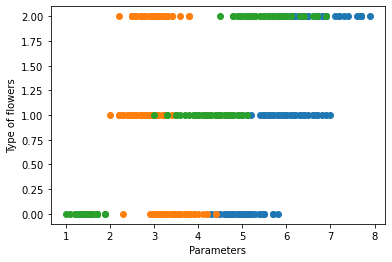

In [25]:
# As seen in the iris dataset it's target only includs 3 classes (0, 1 and 2).
import matplotlib.pyplot as plt

plt.scatter(data[:,0], target)
plt.scatter(data[:,1], target)
plt.scatter(data[:,2], target)
plt.ylabel('Type of flowers')
plt.xlabel('Parameters')


# Dividing data into training and testing dataset

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Accuracy function

In [27]:
def accuracy(y_pred,y_test):
    c=0
    for i in range(0,len(y_pred)):
        if y_pred[i]==y_test[i]:
            c=c+1
    print("Accuracy=",c/len(y_pred)*100)
    from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
    import seaborn as sns
    print("accuracy score:",accuracy_score(y_test, y_pred))
    print("confusion matrix:\n",confusion_matrix(y_test, y_pred))
    print("f1 score:",f1_score(y_test, y_pred, average='macro'))
    # using heatmat to plot accuracy
    a=np.array(y_pred).reshape(-1,1)
    b=np.array(y_test).reshape(-1,1)
    df=pd.DataFrame(np.append(a,b,axis=1))
    df.columns=["predicted_vals","true_vals"]
    cor = df.corr()
    sns.heatmap(cor)
    #to use scatter plot uncomment the below given code
    #plt.scatter(y_test,y_pred)
    plt.show()

# 1) Using RandomForestClassifier from sklearn.ensemble to generate, fit the model and predict the output.

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')
model.fit(x_train,y_train)
y_pred_randF= model.predict(x_test)
y_pred_randF=y_pred_randF.tolist()

# 2) Using Naive Bayes from sklearn.ensemble to generate, fit the model and predict the output.

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_naiveBayes = gnb.fit(x_train, y_train).predict(x_test)

# 3) Using Support Vector Machine from sklearn.ensemble to generate, fit the model and predict the output.

In [30]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred_SVM=clf.predict(x_test)

# 4) Using Stochastic Gradient Descent from sklearn.ensemble to generate, fit the model and predict the output.

In [31]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(x_train, y_train)
SGDClassifier(max_iter=5)
y_pred_SGD=clf.predict(x_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# 5)Using KNN from sklearn.ensemble to generate, fit the model and predict the output.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train,y_train)
y_pred_KNN=neigh.predict(x_test)

Random Forest Accuracy
Accuracy= 100.0
accuracy score: 1.0
confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
f1 score: 1.0


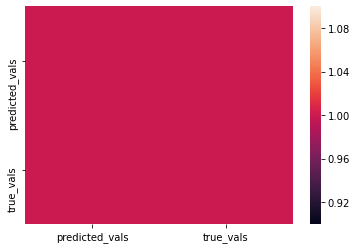


Naive Bayes Accuracy
Accuracy= 100.0
accuracy score: 1.0
confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
f1 score: 1.0


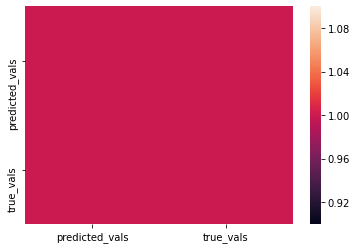


Support Vector Machine Accuracy
Accuracy= 100.0
accuracy score: 1.0
confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
f1 score: 1.0


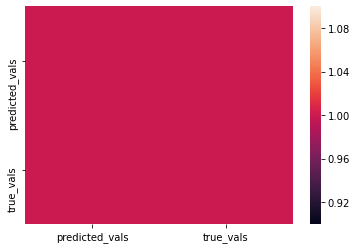


Stochastic Gradient Decent Accuracy
Accuracy= 70.0
accuracy score: 0.7
confusion matrix:
 [[10  0  0]
 [ 6  0  3]
 [ 0  0 11]]
f1 score: 0.5497435897435897


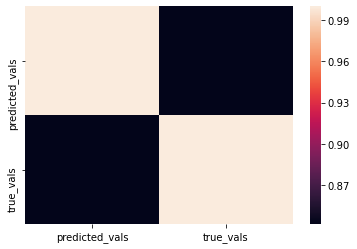


KNN Accuracy
Accuracy= 100.0
accuracy score: 1.0
confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
f1 score: 1.0


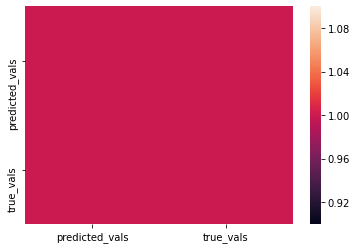

In [33]:
print("Random Forest Accuracy")
accuracy(y_pred_randF,y_test)
print("\nNaive Bayes Accuracy")
accuracy(y_pred_naiveBayes,y_test)
print("\nSupport Vector Machine Accuracy")
accuracy(y_pred_SVM,y_test)
print("\nStochastic Gradient Decent Accuracy")
accuracy(y_pred_SGD,y_test)
print("\nKNN Accuracy")
accuracy(y_pred_KNN,y_test)